<link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.3/css/all.min.css" rel="stylesheet">
<div id="top" style="background-color: lightblue; padding: 5px; border-radius: 10px; text-align: center;">
    <h1> ☁️ Weather Worldwide EDA + Visualization</h1>
</div>
<h1>Table of Contents</h1>
<ul>
    <li><a href="#plan">💡 Notebook plan & code aims</a></li>
    <li><a href="#clean">☁️ EDA + Cleaning</a></li>
    <li><a href="#vis">📈 Visualization</a></li>
    <li><a href="#end">🧠 Conclusions</a></li>
</ul>
<p></p>
<p id='plan'>💡 Notebook plan & code aims:</p>
<ol>
    <li>First of all I want to make a <mark>brief EDA</mark> to figure out more about dataset. I would like to look at the data types, Nan data and take a look at some anomalies (if they exist). Also, I would like to add brief conclusions to satisfy my curiosity. There will be some facts made according to dataset, so it will be interesting</li>
    <li>My next step will <mark>visualization</mark>. Mainly it will consist of scatter plots with regression - I am going to look at the three countries which is located at the same climate conditions as mine (Canada) - Russia and Norway. In that case the plots and made coclusions will be more objective</li>
    <li>Also, in visualization section you find a lot of <mark>basic bars</mark> - I will need them to choose the most objective and logiacal columns for building scatters</li>
    <li>Finally, I will give a list of <mark>my conlusions</mark>, based on the graphs and charts in vis section. All the conclusions will be based on the information personally I am interested in (I think you will like it as well).</li>
</ol>

In [1]:
import numpy as np
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/global-daily-climate-data/countries.csv
/kaggle/input/global-daily-climate-data/weather.csv


<div style="background-color: lightblue; padding: 5px; border-radius: 10px; text-align: center;">
    <h1 id='clean'> ☁️ EDA + Cleaning</h1>
</div>

<p>Now, its time to read the dataset. The code is simple and I don't think I need to explain smth here. I will just add, that I am <mark>not</mark> going to add the index_col at the read file level. Maybe, I will add index later, but for now, for EDA proccess, I don't need it at all. So, here is the reading file cell:</p>

In [2]:
weather_df = pd.read_csv('/kaggle/input/global-daily-climate-data/weather.csv')
weather_df.head()

,country,capital,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
0,Afghanistan,Kabul,1966-03-02,winter,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Kabul,1966-03-28,spring,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Kabul,1966-05-02,spring,18.8,NaN,22.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Kabul,1966-05-04,spring,19.7,NaN,27.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Kabul,1966-05-18,spring,24.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<p>First of all, I would like to take a look at the dataset shape to figure out is it big and <mark>Nan values</mark>. This is my basic start and I usually start my EDA and notebook in general from matrix of Nan values. If you will read my other notebooks and datasets, you will find out that its easier to look at the Nan values as a chart. The whole picture of data in that case is more objective</p>
<p>As you will see below, there are <mark>not so many Nan</mark> values in this dataset, that is why there is no need to drop them (as I think), nevertheless, it was crucial step in EDA and data cleaning</p>

In [3]:
weather_df.shape

(5001395, 14)

<Axes: >

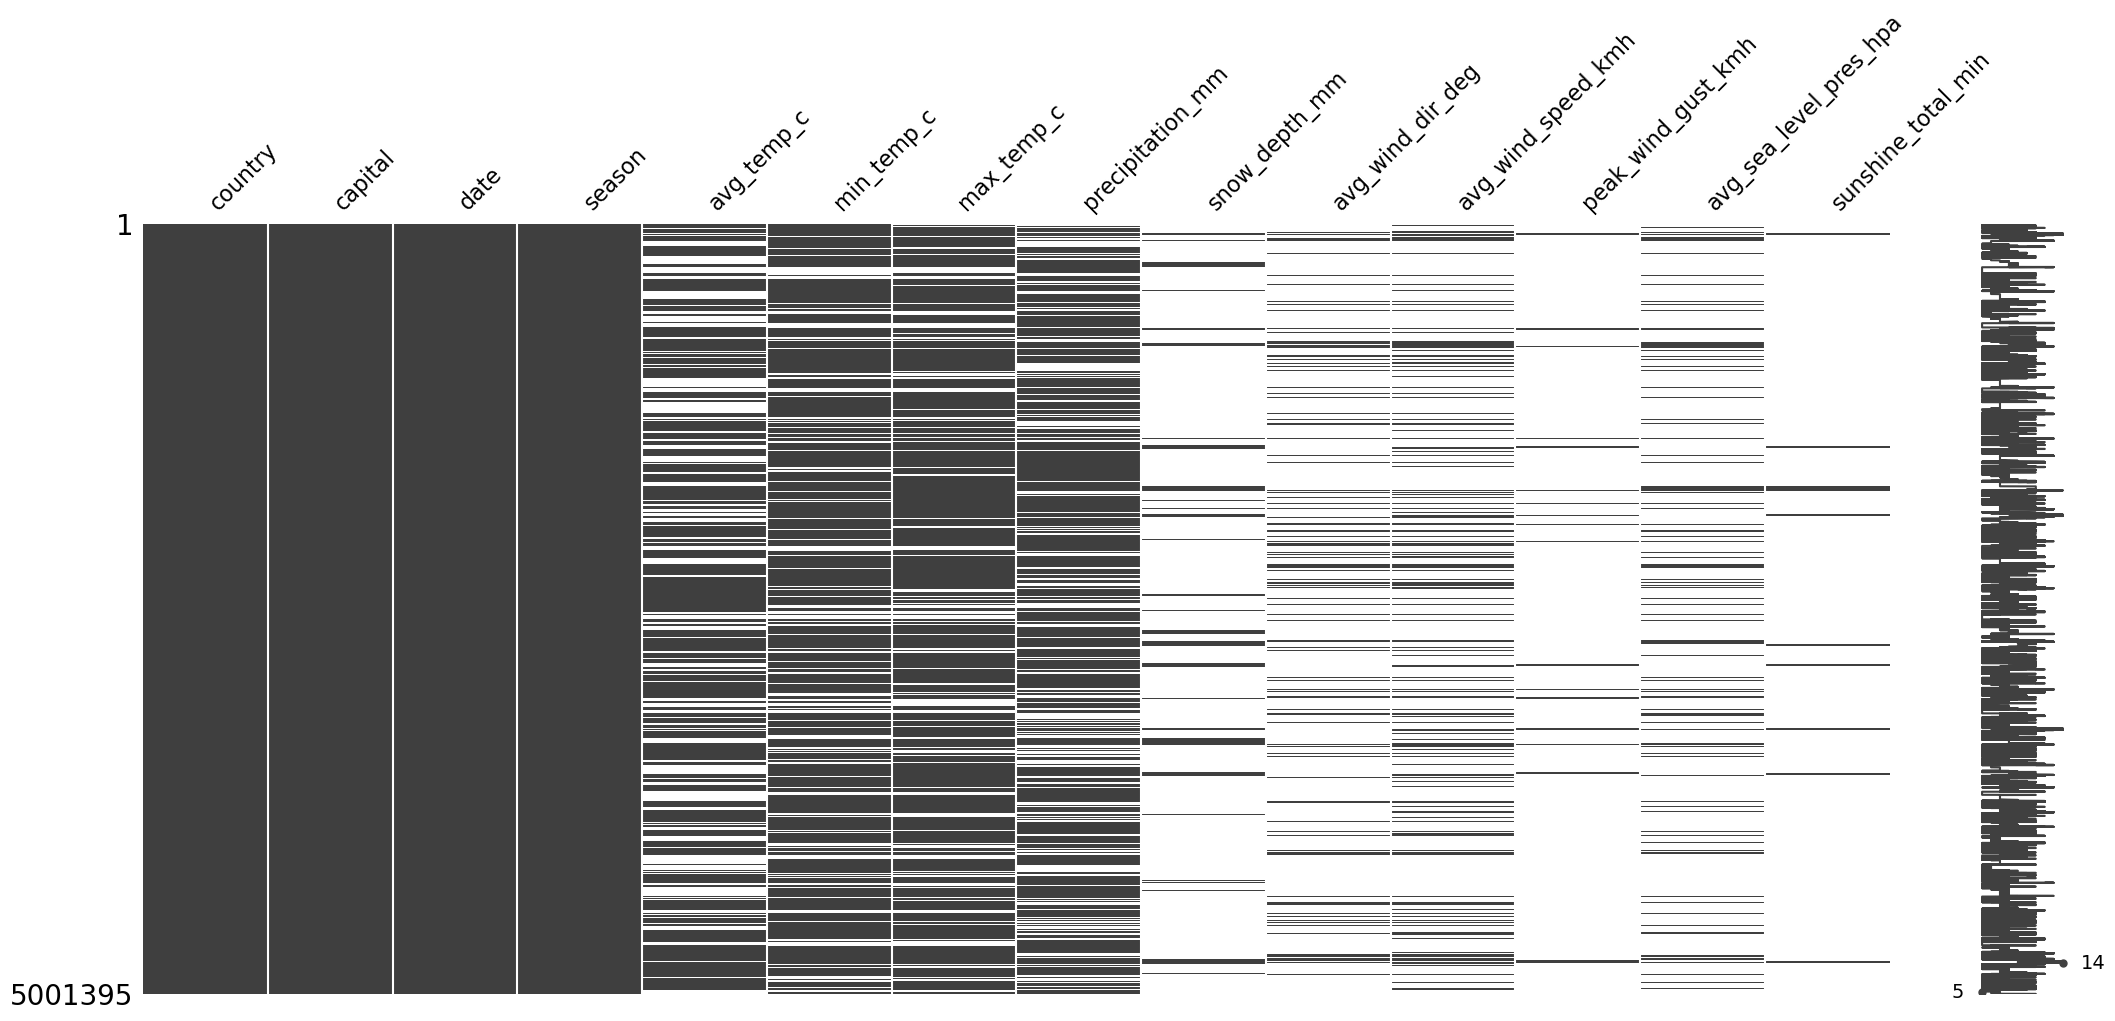

In [4]:
msno.matrix(weather_df)

<p>There are a lot of Nan values, but <mark>I won't drop them</mark>. Mainly, because t]he missed data can't be fulled because of lack information about locations and countries we are analyzing. Moreover, my key countries, which I would like to analyze have full information I need. So, I will skip the step of filling the data or dropping Nan values for now:</p>
<p>Now, I want to look at the whole dataset in a brief and short format. I will do it with <mark>describe</mark> function. I will tell you the truth, I am not really big fan of describe function. I believe, that I will give even more information about my dataframe using bars and other plots, but it is some kind of classic, <mark>basic</mark> step, so I don't have a desire to ruin traditions</p>

In [5]:
weather_df.describe()

,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
count,3.326442e+06,4.011860e+06,4.013753e+06,3.616424e+06,432748.000000,729351.000000,1.103036e+06,187266.000000,727513.000000,145398.000000
mean,1.787318e+01,1.233485e+01,2.133458e+01,3.188509e+00,149.956478,170.711517,1.308016e+01,38.630100,1014.017030,335.196626
std,1.100738e+01,1.055083e+01,1.142508e+01,1.214030e+01,635.920375,107.549258,7.316977e+00,24.401852,7.718091,237.143064
min,-4.780000e+01,-5.160000e+01,-3.920000e+01,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,907.400000,0.000000
25%,1.090000e+01,5.000000e+00,1.370000e+01,0.000000e+00,0.000000,77.000000,7.900000e+00,27.700000,1009.900000,108.000000
50%,2.080000e+01,1.310000e+01,2.390000e+01,0.000000e+00,0.000000,167.000000,1.140000e+01,35.300000,1013.400000,343.000000
75%,2.680000e+01,2.200000e+01,3.040000e+01,1.600000e+00,20.000000,264.000000,1.660000e+01,44.000000,1018.200000,534.000000
max,4.360000e+01,3.900000e+01,6.000000e+01,9.999000e+02,8160.000000,360.000000,1.055000e+02,439.200000,1373.000000,984.000000


<p>The next step for me and my EDA will be <mark>data types</mark> information. I believe that this is the most useful function in EDA, because not knowing the exact datatypes <mark>will ruin all the plots</mark> and charts process. Only after setting new, appropriate datatypes, start your visualization. This is also classic step - don't miss it!</p>
<p>In this dataset I will change only one column data type - Date. I will convert it to <mark>datetime</mark>. Further you will see that I added some new columns due to this action:</p>

In [6]:
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001395 entries, 0 to 5001394
Data columns (total 14 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   country                 object        
 1   capital                 object        
 2   date                    datetime64[ns]
 3   season                  object        
 4   avg_temp_c              float64       
 5   min_temp_c              float64       
 6   max_temp_c              float64       
 7   precipitation_mm        float64       
 8   snow_depth_mm           float64       
 9   avg_wind_dir_deg        float64       
 10  avg_wind_speed_kmh      float64       
 11  peak_wind_gust_kmh      float64       
 12  avg_sea_level_pres_hpa  float64       
 13  sunshine_total_min      float64       
dtypes: datetime64[ns](1), float64(10), object(3)
memory usage: 534.2+ MB


<p>Another classic step for every EDA is to look at the <mark>columns list</mark>. Not long time ago, I made an EDA where the columns names contain extra spaces before and after the name string. It euied my plots and statistics. Since then, I always look at the columns list to make sure that they are written correctly and won't ruin my further calculations:</p>

In [7]:
weather_df.columns

Index(['country', 'capital', 'date', 'season', 'avg_temp_c', 'min_temp_c',
       'max_temp_c', 'precipitation_mm', 'snow_depth_mm', 'avg_wind_dir_deg',
       'avg_wind_speed_kmh', 'peak_wind_gust_kmh', 'avg_sea_level_pres_hpa',
       'sunshine_total_min'],
      dtype='object')

<p>As I promised, here are some basic <mark>manipulations with datetime formats</mark>, which I hate most of all, but they are still very helpful. From Date columns I extract month (in format - 'January', 'February' etc) and year. I did for further plots and statistics. Just make my work and code easier:</p>

In [8]:
weather_df['month'] = weather_df['date'].dt.month
weather_df['year'] = weather_df['date'].dt.year
weather_df['month'] = weather_df['date'].dt.strftime('%B')

<p>Cool, now I am ready to visualize some <mark>brief</mark> facts to satisfy my curiosity. I won't give detailed plot here, just some facts in a string format. Nevertheless, I think they are rather interesting to read - first of all, I wanted to look at the total amount of countries that are present in a dataset. There are <mark>230 countries</mark>, which looks like all the countries amount. Then, I wanted to take a look at the <mark>total amount of seasons</mark> to approve the data correctness (we are still in EDA section, keep it in mind). I also putputed the <mark>start date</mark> and <mark>end date</mark> for this dataset to figure out what date range we have. Finally, I outputed the <mark>median temperature</mark> in 1966 and for the current year (I have chosen median function because, firstly, this year is not finished yet and the calculation for the not ended year would be incorrect and secondly for some countries the temperature delta is too high, for example for Canada - where its +29 in summer and -33 in minture).</p>

In [9]:
print(f"Total amount of countries: {weather_df['country'].nunique()}")
print(f"Total amount of seasons: {weather_df['season'].nunique()}") #Looks like seasons data is not correct
print(f"Start date: {weather_df['date'].min()}")
print(f"End date: {weather_df['date'].max()}")
#count median temp for 1966 and 2023. to satisfly curiosity:
print(f"Median temperature in 1966: {weather_df[weather_df['date'].dt.year == 1966]['avg_temp_c'].median()}")
print(f"Median temperature in 2023: {weather_df[weather_df['date'].dt.year == 2023]['avg_temp_c'].median()}")

Total amount of countries: 230
Total amount of seasons: 4
Start date: 1833-01-02 00:00:00
End date: 2023-08-14 00:00:00
Median temperature in 1966: 16.8
Median temperature in 2023: 23.3


<p>Let's look at out dataset for the last time in this section before moving to visualization. We have done a great job, but most importantely, we figured out a lot about data we will deal with in visualization section. So, <mark>lets move on further</mark>:</p>

In [10]:
weather_df.head()

,country,capital,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min,month,year
0,Afghanistan,Kabul,1966-03-02,winter,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,March,1966
1,Afghanistan,Kabul,1966-03-28,spring,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,March,1966
2,Afghanistan,Kabul,1966-05-02,spring,18.8,NaN,22.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,1966
3,Afghanistan,Kabul,1966-05-04,spring,19.7,NaN,27.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,1966
4,Afghanistan,Kabul,1966-05-18,spring,24.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,1966


<div style="background-color: lightblue; padding: 5px; border-radius: 10px; text-align: center;">
    <h1 id='vis'>📈 Visualization</h1>
</div>

<p>First of all, in the visualization section, I want to look at three country that I have chosen (they have rather similar climate, as I thought, so comparing them will a right way) - <mark>Russia, Canada and Sweden</mark>. I also set the years (1960 and 2023). The thing is that I needed a years where these countries won't have Nans for the necessary columns. So, 1960 was chosen. Moreover, I wanted to look at winter in these countries - because I suppose it will be more objective information to compare here. My result you can see below. <mark>Sorry, Sweden, you are weak at these stage</mark>:</p>

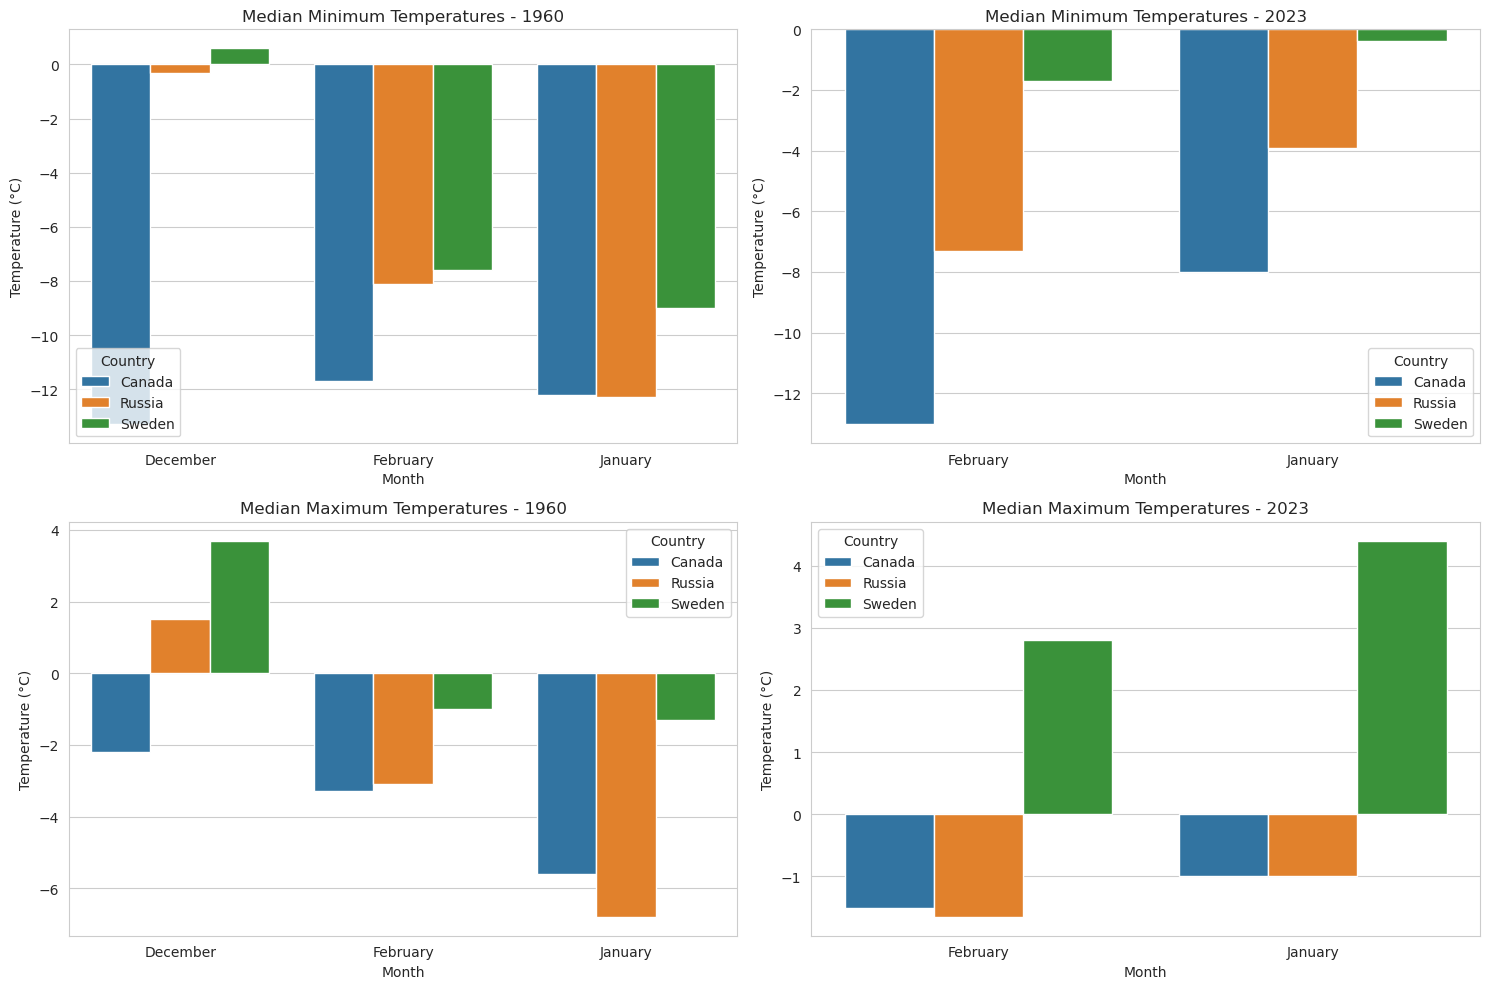

In [11]:
sns.set_style("whitegrid")

selected_countries = ['Canada', 'Russia', 'Sweden']
selected_months = ['January', 'December', 'February']
selected_years = [1960, 2023]
selected_countries_df = weather_df[
    (weather_df['country'].isin(selected_countries)) &
    (weather_df['year'].isin(selected_years)) &
    (weather_df['month'].isin(selected_months))
]

grouped_data = selected_countries_df.groupby(['year', 'country', 'month']).median()[['min_temp_c', 'max_temp_c']].reset_index()

# create a 2x2 grid for the subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# create separate plots for 1960 and 2023 for min and max temperatures
for i, year in enumerate(selected_years):
    year_data = grouped_data[grouped_data['year'] == year]
    
    # plot median minimum temperatures
    sns.barplot(data=year_data, x='month', y='min_temp_c', hue='country', ax=axs[0, i])
    axs[0, i].set_title(f'Median Minimum Temperatures - {year}')
    axs[0, i].set_xlabel('Month')
    axs[0, i].set_ylabel('Temperature (°C)')
    axs[0, i].legend(title='Country')
    
    # plot median maximum temperatures
    sns.barplot(data=year_data, x='month', y='max_temp_c', hue='country', ax=axs[1, i])
    axs[1, i].set_title(f'Median Maximum Temperatures - {year}')
    axs[1, i].set_xlabel('Month')
    axs[1, i].set_ylabel('Temperature (°C)')
    axs[1, i].legend(title='Country')

plt.tight_layout()
plt.show()

<p>I'd like to invest more time in EDA for Canada, that is why, I am going to build up <mark>scatter plot with trendline</mark> to figure out - whether the median temperature is increasing for Canada. So, what do you think about global heating, Canda? To tell the truth I expected the other result. The trend line looks almost flat which means that average temperature within a year hasnt changed since 1950. Let's look at the <mark>other countries statistics</mark> to figure out what they have</p>

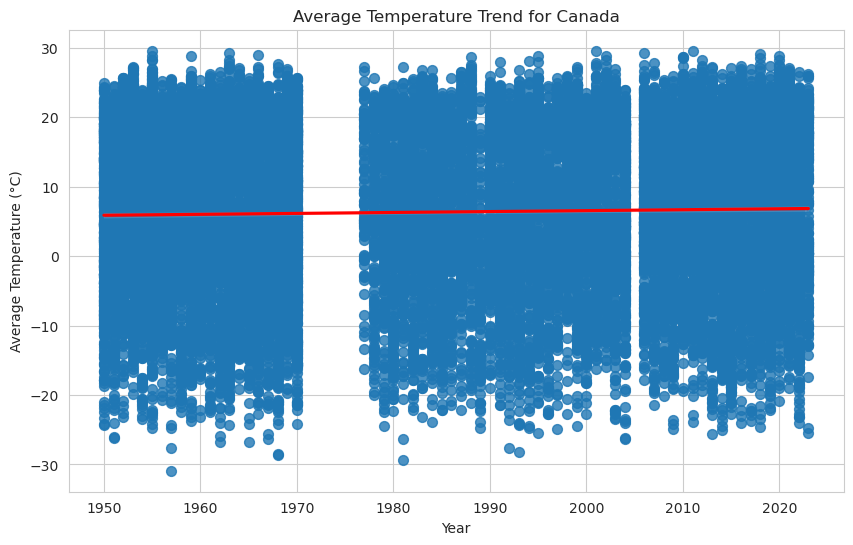

In [12]:
sns.set_style("whitegrid")

selected_countries = ['Canada']
weather_df_selected = weather_df[weather_df['country'].isin(selected_countries)]

# create the line plot with trend line
plt.figure(figsize=(10, 6))
sns.regplot(data=weather_df_selected, x='year', y='avg_temp_c', scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Average Temperature Trend for Canada')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.show()

<p>For my next experiment I have chosen <mark>Mexico</mark>. First of all, I wanted to look at the country with more soft and warm climate. Secondly, this is almost the only country with full information about average temperature. For the plot below we can male a simple conclusion - for the countries with more soft climate (warm), the average temperature eithin a year <mark>increased almost in 3C within last 40 years, which is a lot.</mark></p>

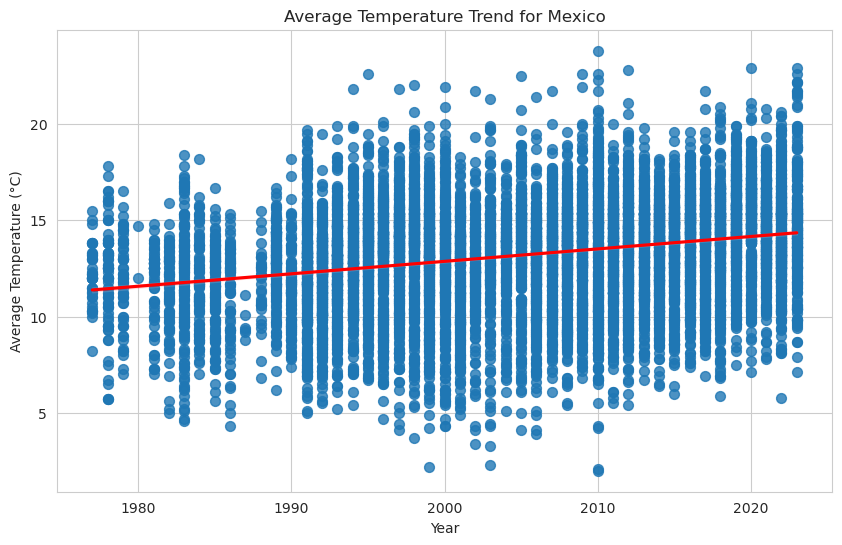

In [13]:
sns.set_style("whitegrid")

selected_countries = ['Mexico']
weather_df_selected = weather_df[weather_df['country'].isin(selected_countries)]

# create the line plot with trend line
plt.figure(figsize=(10, 6))
sns.regplot(data=weather_df_selected, x='year', y='avg_temp_c', scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Average Temperature Trend for Mexico')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.show()

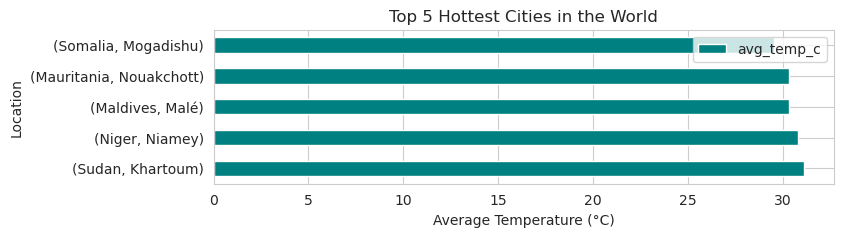

In [14]:
weather_df.groupby(['country','capital']).median()[['avg_temp_c']].sort_values('avg_temp_c', ascending = False).head().plot(kind='barh', color = 'teal', grid = True, figsize = (8,2))
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Location')
plt.title('Top 5 Hottest Cities in the World')
plt.show()

<div style="background-color: lightblue; padding: 5px; border-radius: 10px; text-align: center;">
    <h1 id='end'>🧠 Conclusions</h1>
</div>
<p>Thank you very much for reading my notebook up to the end, I really appreciate it. I clearly understand that covered only 5% of dataset potencial and I am sure that there are many conclusions you can make there, but I decided to finish my EDA here. I learned everything that I wanted in this data - <mark>everything I was curious about</mark>. I hope you find my notebook interesting and, which is more crucial, useful. Feel free to write me comments - I am reading all of them and give you feedback as well. Good luck!</p>
<p style='text-align:center'><a href="#top">Back to Table of Contents</a></p>